# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [12]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Relevant feature #0     9.566665
Relevant feature #1    40.192077
Noisy feature #0        0.000000
Noisy feature #1        0.000000
Noisy feature #2        0.000000
dtype: float64

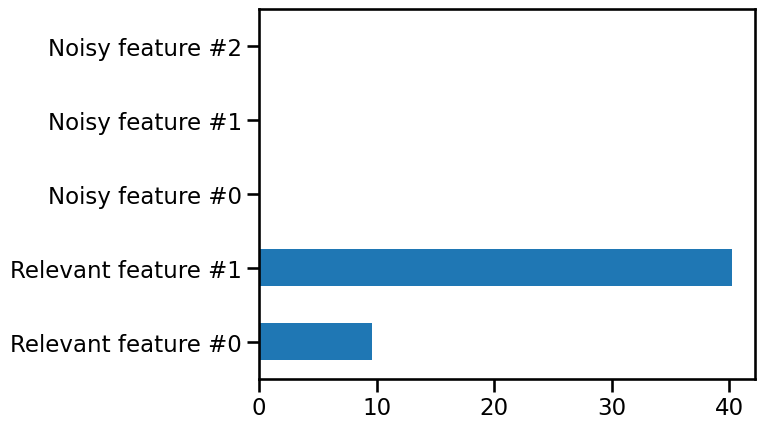

In [2]:
import pandas as pd

feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [3]:
# Write your code here.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data, target)
model.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

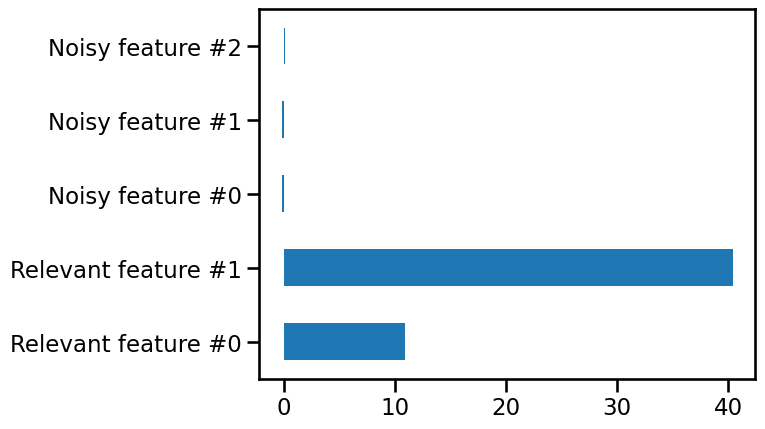

In [6]:
feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(model.coef_, index=feature_names)
_ = coef.plot.barh()

Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [13]:
# Write your code here.
import numpy as np

data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)
data.shape

(2000, 9)

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [14]:
# Write your code here.
model = LinearRegression()
model.fit(data, target)
model.coef_

array([ 3.63195668, 13.47042681, -0.20542454, -0.18954462,  0.11129768,
        3.63195668, 13.47042681,  3.63195668, 13.47042681])

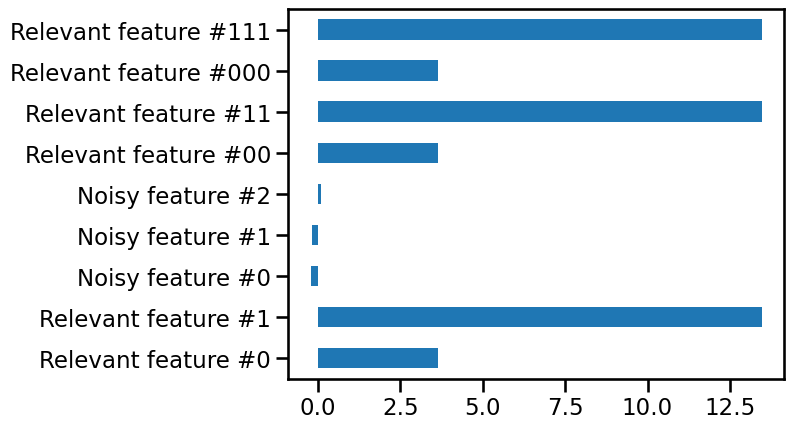

In [15]:
feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
    "Relevant feature #00",
    "Relevant feature #11",
    "Relevant feature #000",
    "Relevant feature #111",
]
coef = pd.Series(model.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficient values are far from what one could expect.
By repeating the informative features, one would have expected these
coefficients to be similarly informative.

Instead, we see that some coefficients have a huge norm ~1e14. It indeed
means that we try to solve an mathematical ill-posed problem. Indeed, finding
coefficients in a linear regression involves inverting the matrix
`np.dot(data.T, data)` which is not possible (or lead to high numerical
errors).

Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

In [16]:
# Write your code here.
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

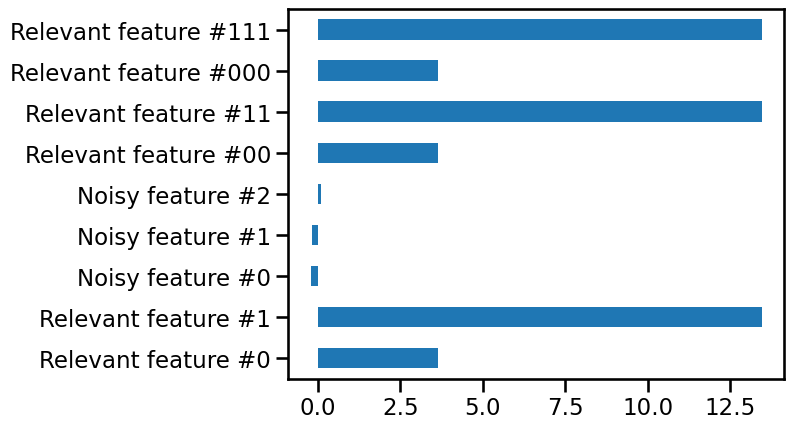

In [17]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

Can you find the relationship between the ridge coefficients and the original
coefficients?

In [18]:
# Write your code here.
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])